<a href="https://colab.research.google.com/github/kiranshahi/Natural-Language-Processing/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

## Problem description

Though the Sentiment analysis problem is considered as the basic problem in natural language processing, it is still a challenging problem if we want to achieve a perfect performance. Because of the wide variety of writing styles, sarcasm, slang, etc.

In this lab task, we are going to use the "movie_reviews" dataset from the nltk corpus. This dataset contains a set of 1000 positive and 1000 negative reviews.

We can formulate this problem of sentiment analysis for movie reviews in the following ways.

*   Load the positive and negative reviews separately into raw_data
*   We generate the labels for the reviews, 0 for positive and 1 for negative. From "raw_data" and "labels", we split 80% data into the training set and 20% in the testing set.
*   Convert the text into tf-idf / tf vectors.
*   Train the data with naïve Bayes classifier. Since our data are discrete, we will use Multinomial Naïve Bayes classifier to train dataset.
*   Next, we will evaluate the performance from the metrics of precision, recall and f1-score.

## Implementation and Results

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')
# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
  raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
  raw_data.append(movie_reviews.raw(fileids_neg[i]))

# The corresponding labels for the reviews, 0 for postive, 1 for negative
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)

# Split the training and testing set by 80-20%
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
# Calculate the tf-idf features from the training set
def calculate_tf_tfid(is_tfidf):
  tfidf = TfidfVectorizer(use_idf=is_tfidf)
  tfidf_data = tfidf.fit_transform(X_train)
  # print(tfidf_data.shape)
  
  # Train the naive Bayes model for prediction
  classifier = MultinomialNB().fit(tfidf_data, Y_train)

  test_performance(classifier, tfidf)


In [ ]:
# Evaluate the sentiment for each sentence in a review, and plot the variation of sentiment
def plot_sentiment_variation(classifier, tfidf):
  sentences = X_test[0].split('.')
  testing_tfidf = tfidf.transform(sentences)
  predictions = classifier.predict_proba(testing_tfidf)
  polarity = [x[0] - x[1] for x in predictions]
  # polarity = [x[0] if (x[0] > x[1]) else -x[1] for x in predictions]
  
  plt.xlabel('Sentences')
  plt.ylabel('Polarity')
  plt.plot(polarity)
  plt.ylim(-1, 1)

In [ ]:
# Performance on the testing set
def test_performance(classifier, tfidf):
  testing_tfidf = tfidf.transform(X_test)
  predictions = classifier.predict(testing_tfidf)
  print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))
  plot_sentiment_variation(classifier,tfidf)

Performance evaluation metrics for tf-idf feature
              precision    recall  f1-score   support

         pos       0.93      0.54      0.68       216
         neg       0.64      0.95      0.76       184

    accuracy                           0.73       400
   macro avg       0.78      0.75      0.72       400
weighted avg       0.80      0.73      0.72       400



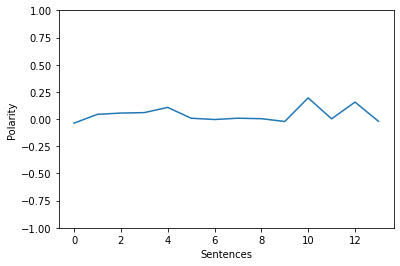

In [ ]:
#implementing the tf-idf feature
print("Performance evaluation metrics for tf-idf feature")
calculate_tf_tfid(True)

Performance evaluation metrics for tf feature
              precision    recall  f1-score   support

         pos       1.00      0.08      0.15       216
         neg       0.48      1.00      0.65       184

    accuracy                           0.50       400
   macro avg       0.74      0.54      0.40       400
weighted avg       0.76      0.50      0.38       400



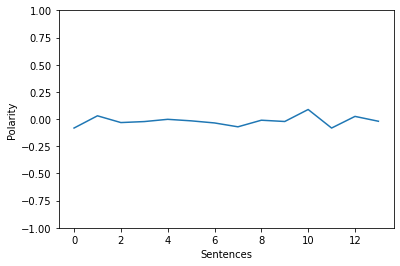

In [ ]:
#implementing the tf features
print("Performance evaluation metrics for tf feature")
calculate_tf_tfid(False)

In [ ]:
# print(X_train[0])
# print(testing_tfidf[0])

## Discussions
In this task, we had implemented sentiment analysis using the simple word count (tf/tf-idf) features and naïve Bayes method on "movie_reviews" dataset, where we have 1000 positive and 1000 negative reviews.

### For tf feature
When using the tf feature we got an accuracy of 0.79 which means our model is 79% accurate. The result shows that the precision for positive is 0.89 (89%) and negative is 0.73 (73%). It means that 89 out of 100 reviews that were predicted positive are correct and others are false predictions. Similarly, 73 out of 100 negative reviews predicted were correct and the rest are false predictions. In comparison, to the tf-idf feature, the accuracy of negative prediction is quite low.

Likewise, the recall value for positive and negative prediction was 0.64 and 0.93 respectively. It means that model was able to predict 64 positive reviews out of 100 positive reviews. Similarly, it was able to predict 93 negative reviews out of 100 negative reviews which is pretty good.

### For tf-idf feature
After using the tf-idf feature we got an accuracy of 0.83 which is higher than the tf feature. It means the sentiment analysis model using tf-idf feature is 83% accurate. From metrics for the performance evaluation displayed above, we got a precision of 0.84 for positive and 0.82 for negative. It means that 84% of the review predicted positive was correct and the rest were false prediction. Similarly, 82% of the review predicted negative was correct and the rest were false predictions.

Likewise, the recall value for positive was 0.80 and negative was 0.85. It means that model was able to predict 80 positive reviews out of 100 positive reviews and 85 negative reviews out of 100 negative reviews.